In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [56]:
rcParams['figure.figsize'] = 10, 6


In [57]:
df = pd.read_csv('Trading-features.csv')

In [58]:
print(df.head())
print(df.describe())
print(df.info())

         id  last_price                  created_at        f1     f2    f3  \
0  55466910     43138.2  2023-12-27 12:47:41.916971  0.000463  15139 -43.1   
1  55466909     43138.2  2023-12-27 12:47:40.693372  0.000463  15140 -43.1   
2  55466908     43138.2  2023-12-27 12:47:39.968797  0.000463  15141 -37.4   
3  55466907     43138.2  2023-12-27 12:47:38.919784  0.000463  15142 -37.4   
4  55466906     43132.6  2023-12-27 12:47:37.881533  0.000463  15143 -39.6   

     f4   f5   f6   f7  ...   f152   f153   f154   f155   f156   f157   f158  \
0  43.0 -0.1 -4.8 -5.1  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
1  43.0 -0.1 -4.7 -5.1  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
2  43.0  5.6 -1.9 -0.6  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
3  37.4  0.0 -3.7 -6.2  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
4  36.5 -3.1 -3.7 -9.4  ...  689.6 -129.4  689.6 -129.4 -129.4  689.6  689.6   

    f159   f160   f161  
0 -123.8 -123.8  695.2  


In [59]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 id            0
last_price    0
created_at    0
f1            0
f2            0
             ..
f157          0
f158          0
f159          0
f160          0
f161          0
Length: 164, dtype: int64


In [60]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [61]:
df['date'] = df['created_at'].dt.strftime('%Y-%m-%d')
df['created_at'] = df['created_at'].dt.strftime('%H:%M:%S')

In [62]:
df.set_index('created_at', inplace=True)


In [63]:
print(df.head())

                  id  last_price        f1     f2    f3    f4   f5   f6   f7  \
created_at                                                                     
12:47:41    55466910     43138.2  0.000463  15139 -43.1  43.0 -0.1 -4.8 -5.1   
12:47:40    55466909     43138.2  0.000463  15140 -43.1  43.0 -0.1 -4.7 -5.1   
12:47:39    55466908     43138.2  0.000463  15141 -37.4  43.0  5.6 -1.9 -0.6   
12:47:38    55466907     43138.2  0.000463  15142 -37.4  37.4  0.0 -3.7 -6.2   
12:47:37    55466906     43132.6  0.000463  15143 -39.6  36.5 -3.1 -3.7 -9.4   

              f8  ...   f153   f154   f155   f156   f157   f158   f159   f160  \
created_at        ...                                                           
12:47:41    -4.3  ... -123.8  695.2 -123.8 -123.8  695.2  695.2 -123.8 -123.8   
12:47:40    -2.4  ... -123.8  695.2 -123.8 -123.8  695.2  695.2 -123.8 -123.8   
12:47:39    -2.4  ... -123.8  695.2 -123.8 -123.8  695.2  695.2 -123.8 -123.8   
12:47:38   -10.2  ... -123.8  695.

In [64]:
print("Minimum date:", df['date'].min())

Minimum date: 2023-12-27


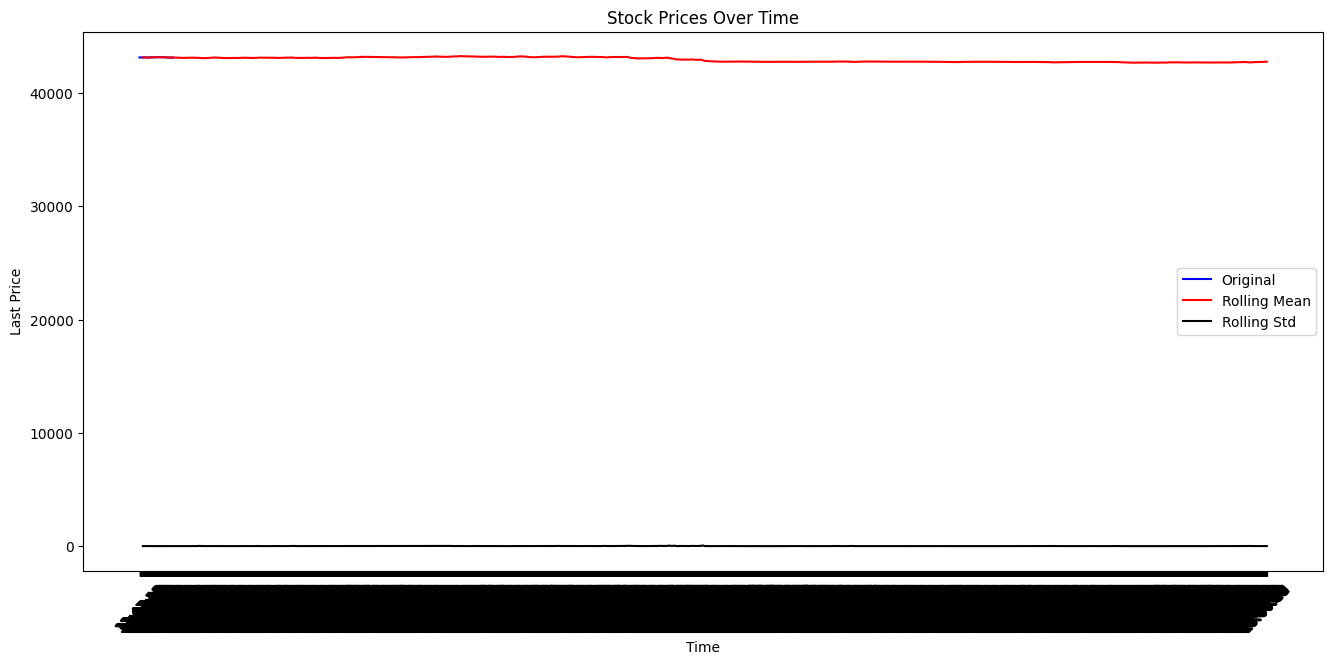

In [65]:
rolmean = df['last_price'].rolling(window=30).mean()
rolstd = df['last_price'].rolling(window=30).std()

plt.figure(figsize=(16, 7))
plt.plot(df['last_price'][:300], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.title('Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0.98, '\nAdditive Decompose')

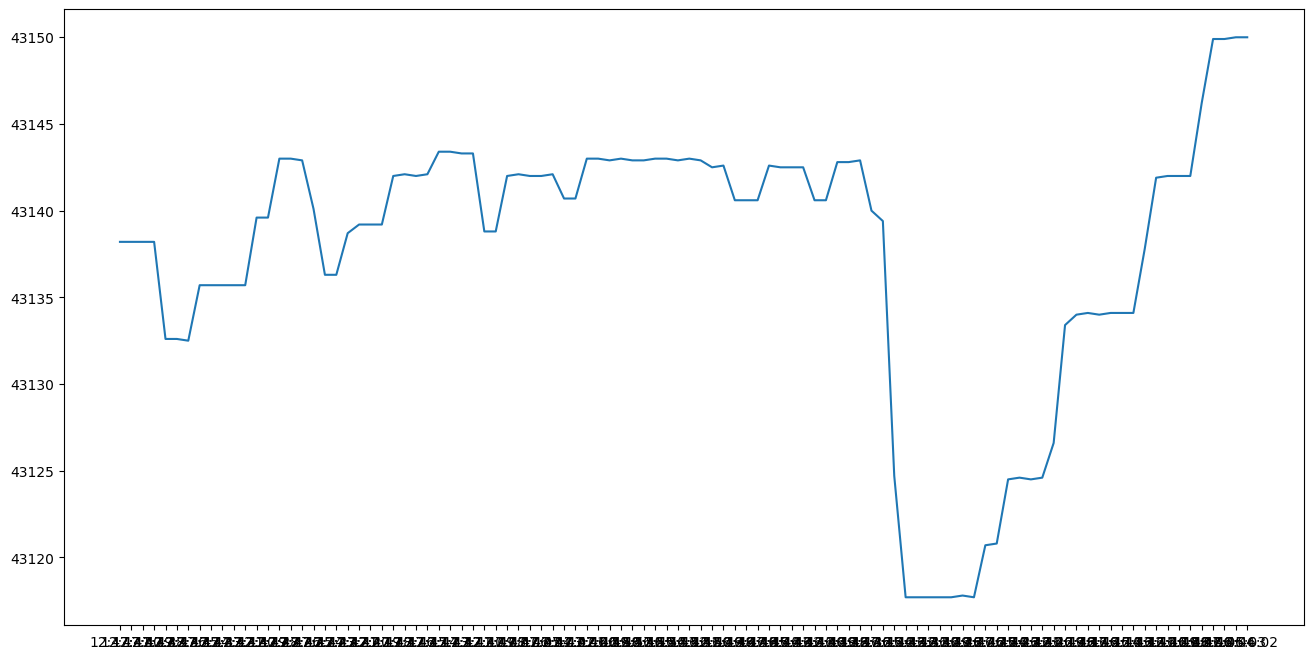

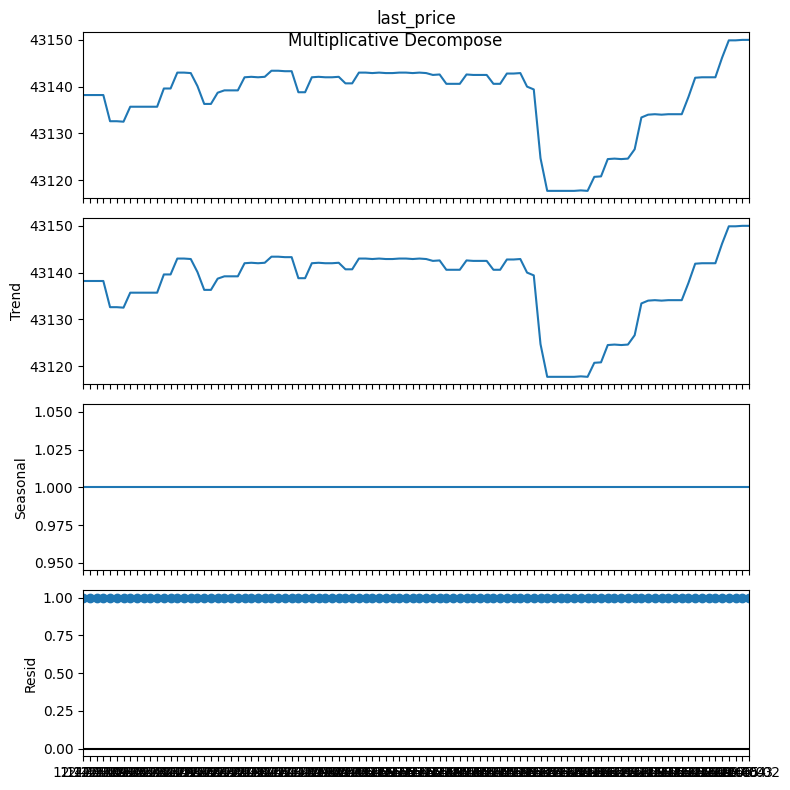

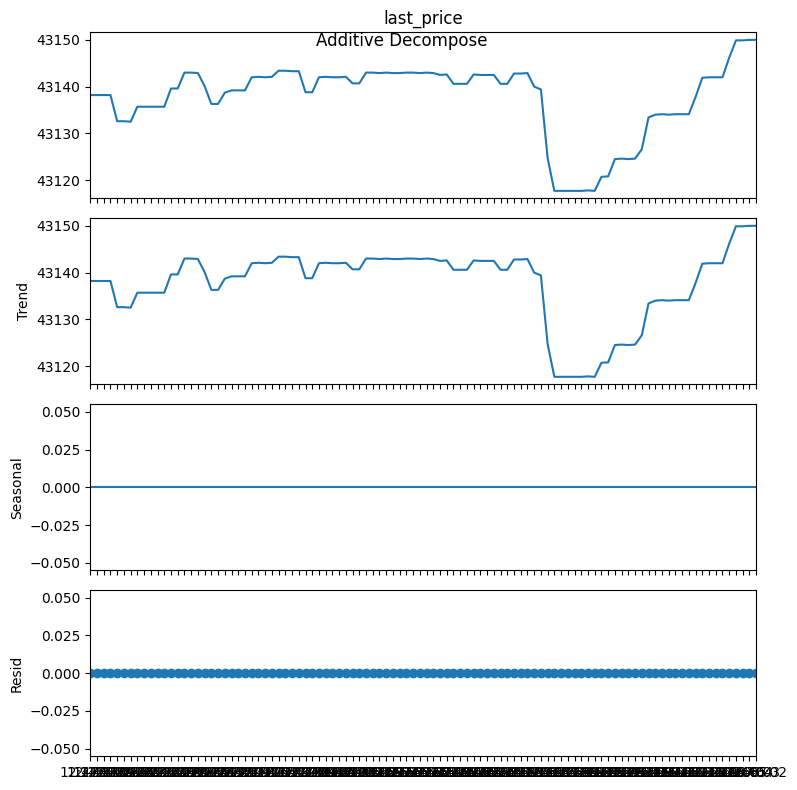

In [66]:
plt.rcParams.update({'figure.figsize': (16, 8)})
plt.plot(df['last_price'][:100])

mul_result = seasonal_decompose(df['last_price'][:100], model='multiplicative', period=1)
ad_result = seasonal_decompose(df['last_price'][:100], model='additive', period=1)

plt.rcParams.update({'figure.figsize': (8, 8)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

plt.rcParams.update({'figure.figsize': (8, 8)})
ad_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

In [67]:
adf_result = adfuller(df['last_price'], autolag='AIC')
print('ADF value:', adf_result[0])
print('P-value:', adf_result[1])

ADF value: -0.8180374711596152
P-value: 0.813766195336873


In [68]:
df.drop('date', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

In [69]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1:2].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9995781863911463


In [73]:
y_pred = model.predict(X_test)

In [74]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 3.1021149019229624
Mean Squared Error (MSE): 17.58904187332369
Root Mean Squared Error (RMSE): 4.193929168849146
